## Ti_0.14N

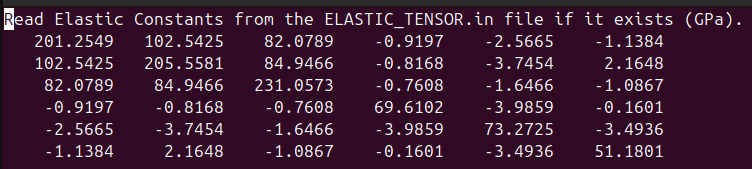
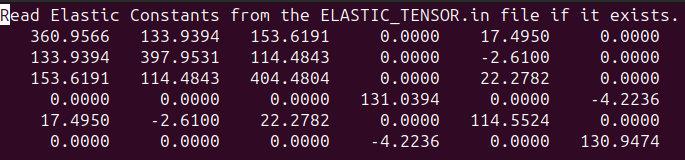

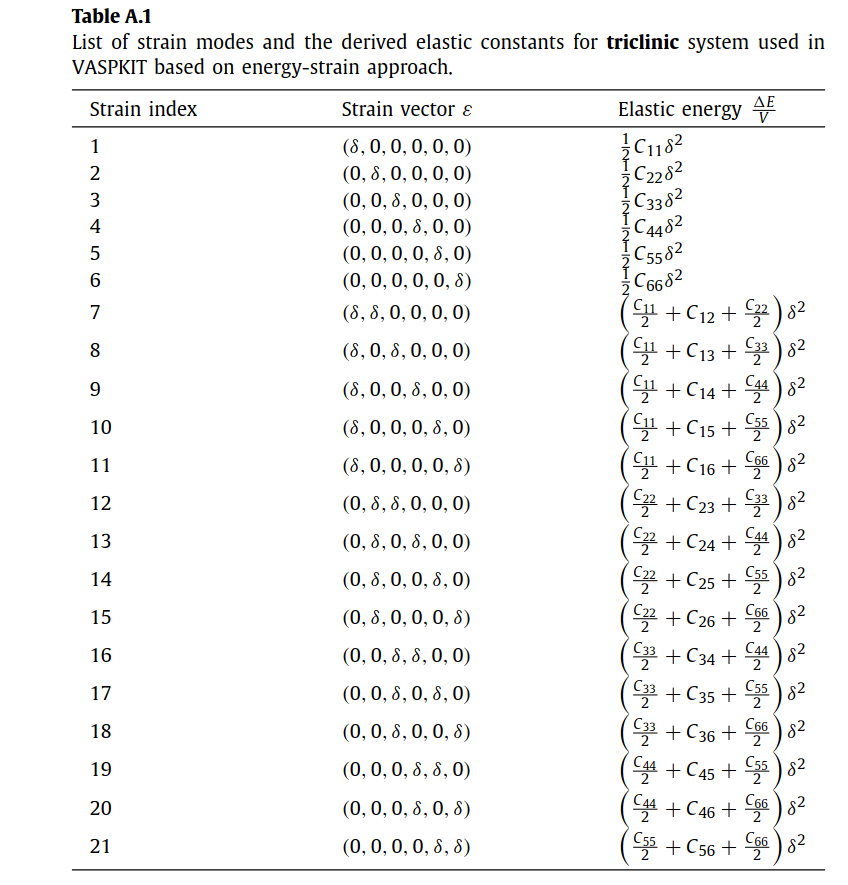
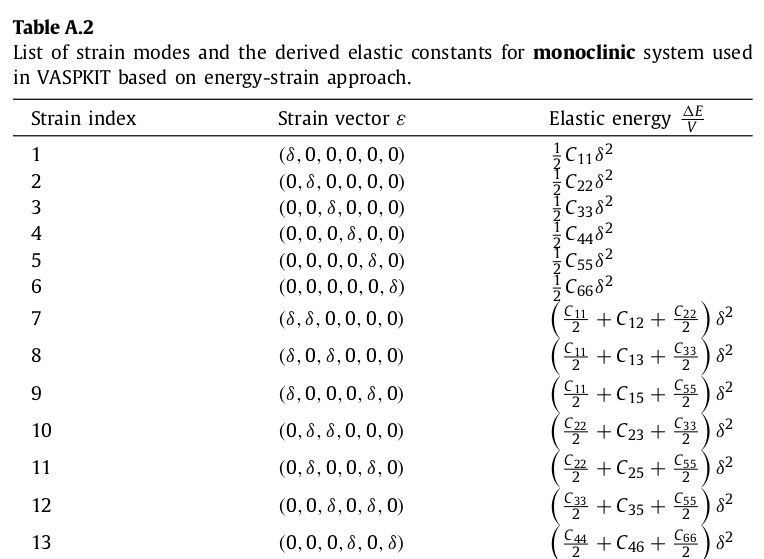

## DFT

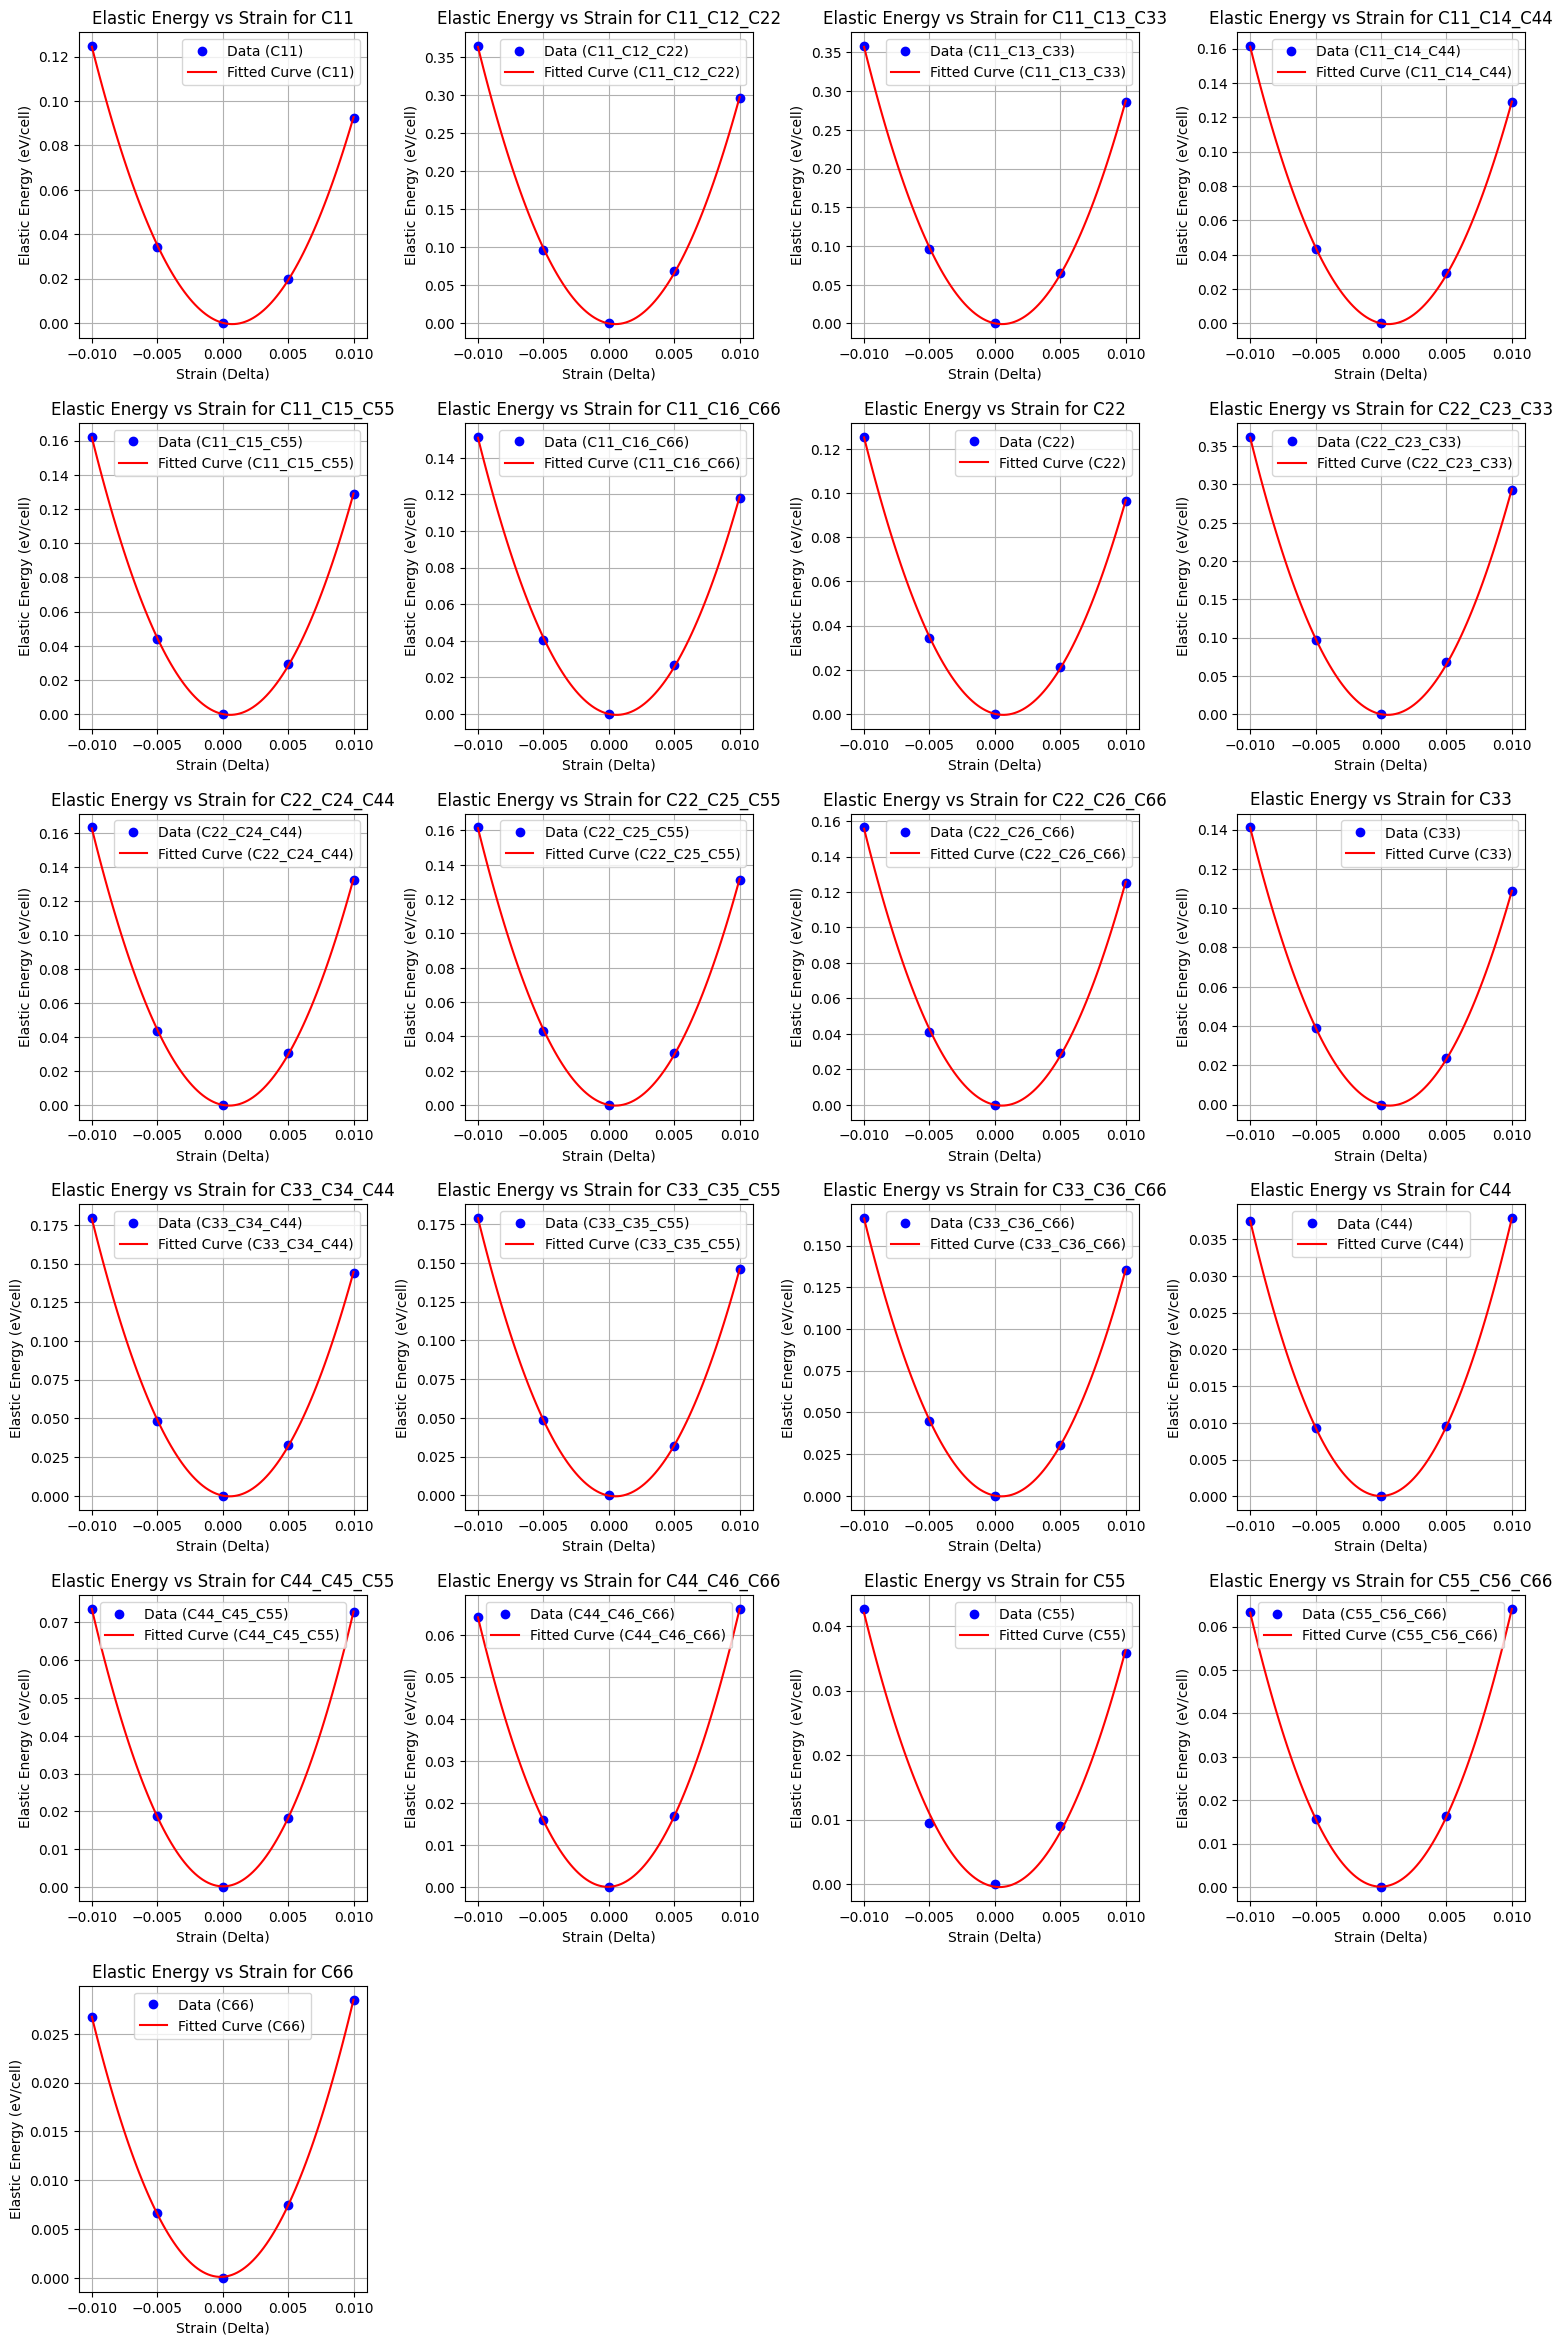

200.98046252232803
305.8409837747592
298.30600103131314
134.20200844053338
134.51927087184603
124.88506837466095
205.2000528586267
302.95918335707506
136.74539559817586
135.53186679841525
130.27588585316943
231.03050247371596
149.6209626017872
150.40089941208512
139.70915547719298
69.6814053281792
67.56103474564989
60.22434102180795
73.3404987024236
58.78608466656826
50.94177105251269


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('Ti_0.14_elastic_constants_dft.csv')

# Extract the strain values
strain_values = data['Strain_values']

# Define formulas for each column based on the image
formulas = {
    'C11': lambda coef: 2 * coef,  # 1/2 * C11 * delta^2
    'C22': lambda coef: 2 * coef,  # 1/2 * C22 * delta^2
    'C33': lambda coef: 2 * coef,  # 1/2 * C33 * delta^2
    'C44': lambda coef: 2 * coef,  # 1/2 * C44 * delta^2
    'C55': lambda coef: 2 * coef,  # 1/2 * C55 * delta^2
    'C66': lambda coef: 2 * coef,  # 1/2 * C66 * delta^2
    'C11_C12_C22': lambda coef: 1 * coef,  # (C11/2 + C12 + C22/2) * delta^2
    'C11_C13_C33': lambda coef: 1 * coef,  # (C11/2 + C13 + C33/2) * delta^2
    'C11_C14_C44': lambda coef: 1 * coef,  # (C11/2 + C14 + C44/2) * delta^2
    'C11_C15_C55': lambda coef: 1 * coef,  # (C11/2 + C15 + C55/2) * delta^2
    'C11_C16_C66': lambda coef: 1 * coef,  # (C11/2 + C16 + C66/2) * delta^2
    'C22_C23_C33': lambda coef: 1 * coef,  # (C22/2 + C23 + C33/2) * delta^2
    'C22_C24_C44': lambda coef: 1 * coef, 
    'C22_C25_C55': lambda coef: 1 * coef,  # (C22/2 + C25 + C55/2) * delta^2
    'C22_C26_C66': lambda coef: 1 * coef,  # (C22/2 + C26 + C66/2) * delta^2
    'C33_C34_C44': lambda coef: 1 * coef,
    'C33_C35_C55': lambda coef: 1 * coef,  # (C33/2 + C35 + C55/2) * delta^2
    'C33_C36_C66': lambda coef: 1 * coef,  # (C33/2 + C36 + C66/2) * delta^2
    'C44_C45_C55': lambda coef: 1 * coef,
    'C44_C46_C66': lambda coef: 1 * coef,  # (C44/2 + C46 + C66/2) * delta^2
    'C55_C56_C66': lambda coef: 1 * coef
}

# The rest of the script remains the same

# Prepare to store computed C-values
C_values = {}
V0 = 1731.43

# Define subplot grid dimensions
num_columns = len(data.columns) - 1  # Excluding 'Strain_values'
num_rows = (num_columns + 3) // 4  # For a 3x4 grid layout, adjust as needed

fig, axs = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))
fig.tight_layout(pad=4.0)  # Adjust spacing between subplots

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Iterate over each column in the DataFrame (excluding 'Strain_values')
for i, column in enumerate(data.columns[1:]):
    # Fit a quadratic polynomial to the data
    coefficients = np.polyfit(strain_values, data[column], 2)
    
    # Apply the specific formula for each column
    if column in formulas:
        C_value = formulas[column](coefficients[0])
        C_values[column] = C_value * (160.21766/V0)
    else:
        print(f"No formula defined for {column}, skipping.")
        continue

    # Generate values for the fitted curve
    strain_fit = np.linspace(strain_values.min(), strain_values.max(), 100)
    energy_fit = np.polyval(coefficients, strain_fit)

    # Plot the data and the fitted curve in a subplot
    axs[i].plot(strain_values, data[column], 'o', label=f"Data ({column})", color="blue")
    axs[i].plot(strain_fit, energy_fit, '-', label=f"Fitted Curve ({column})", color="red")
    axs[i].set_title(f"Elastic Energy vs Strain for {column}")
    axs[i].set_xlabel("Strain (Delta)")
    axs[i].set_ylabel("Elastic Energy (eV/cell)")
    axs[i].legend()The comparison was not
intended to imply a direct equivalence of a specially fitted potential and a general pur-
pose model,but rather to provide a contextual baseline illustrating the performance of
different class of potential when applied without system specific training. To avoid any
misinterpretation, we have added some additional points on system specific training
fitting vs transferability of a universal potentia
    axs[i].grid(True)

# Remove any empty subplots (if number of columns < grid size)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout and show the plot
plt.show()

# Print out the calculated C-values
for key, value in C_values.items():
    #print(f"{key} C-value: {value} GPa")
    print(f"{value}")


## Potential

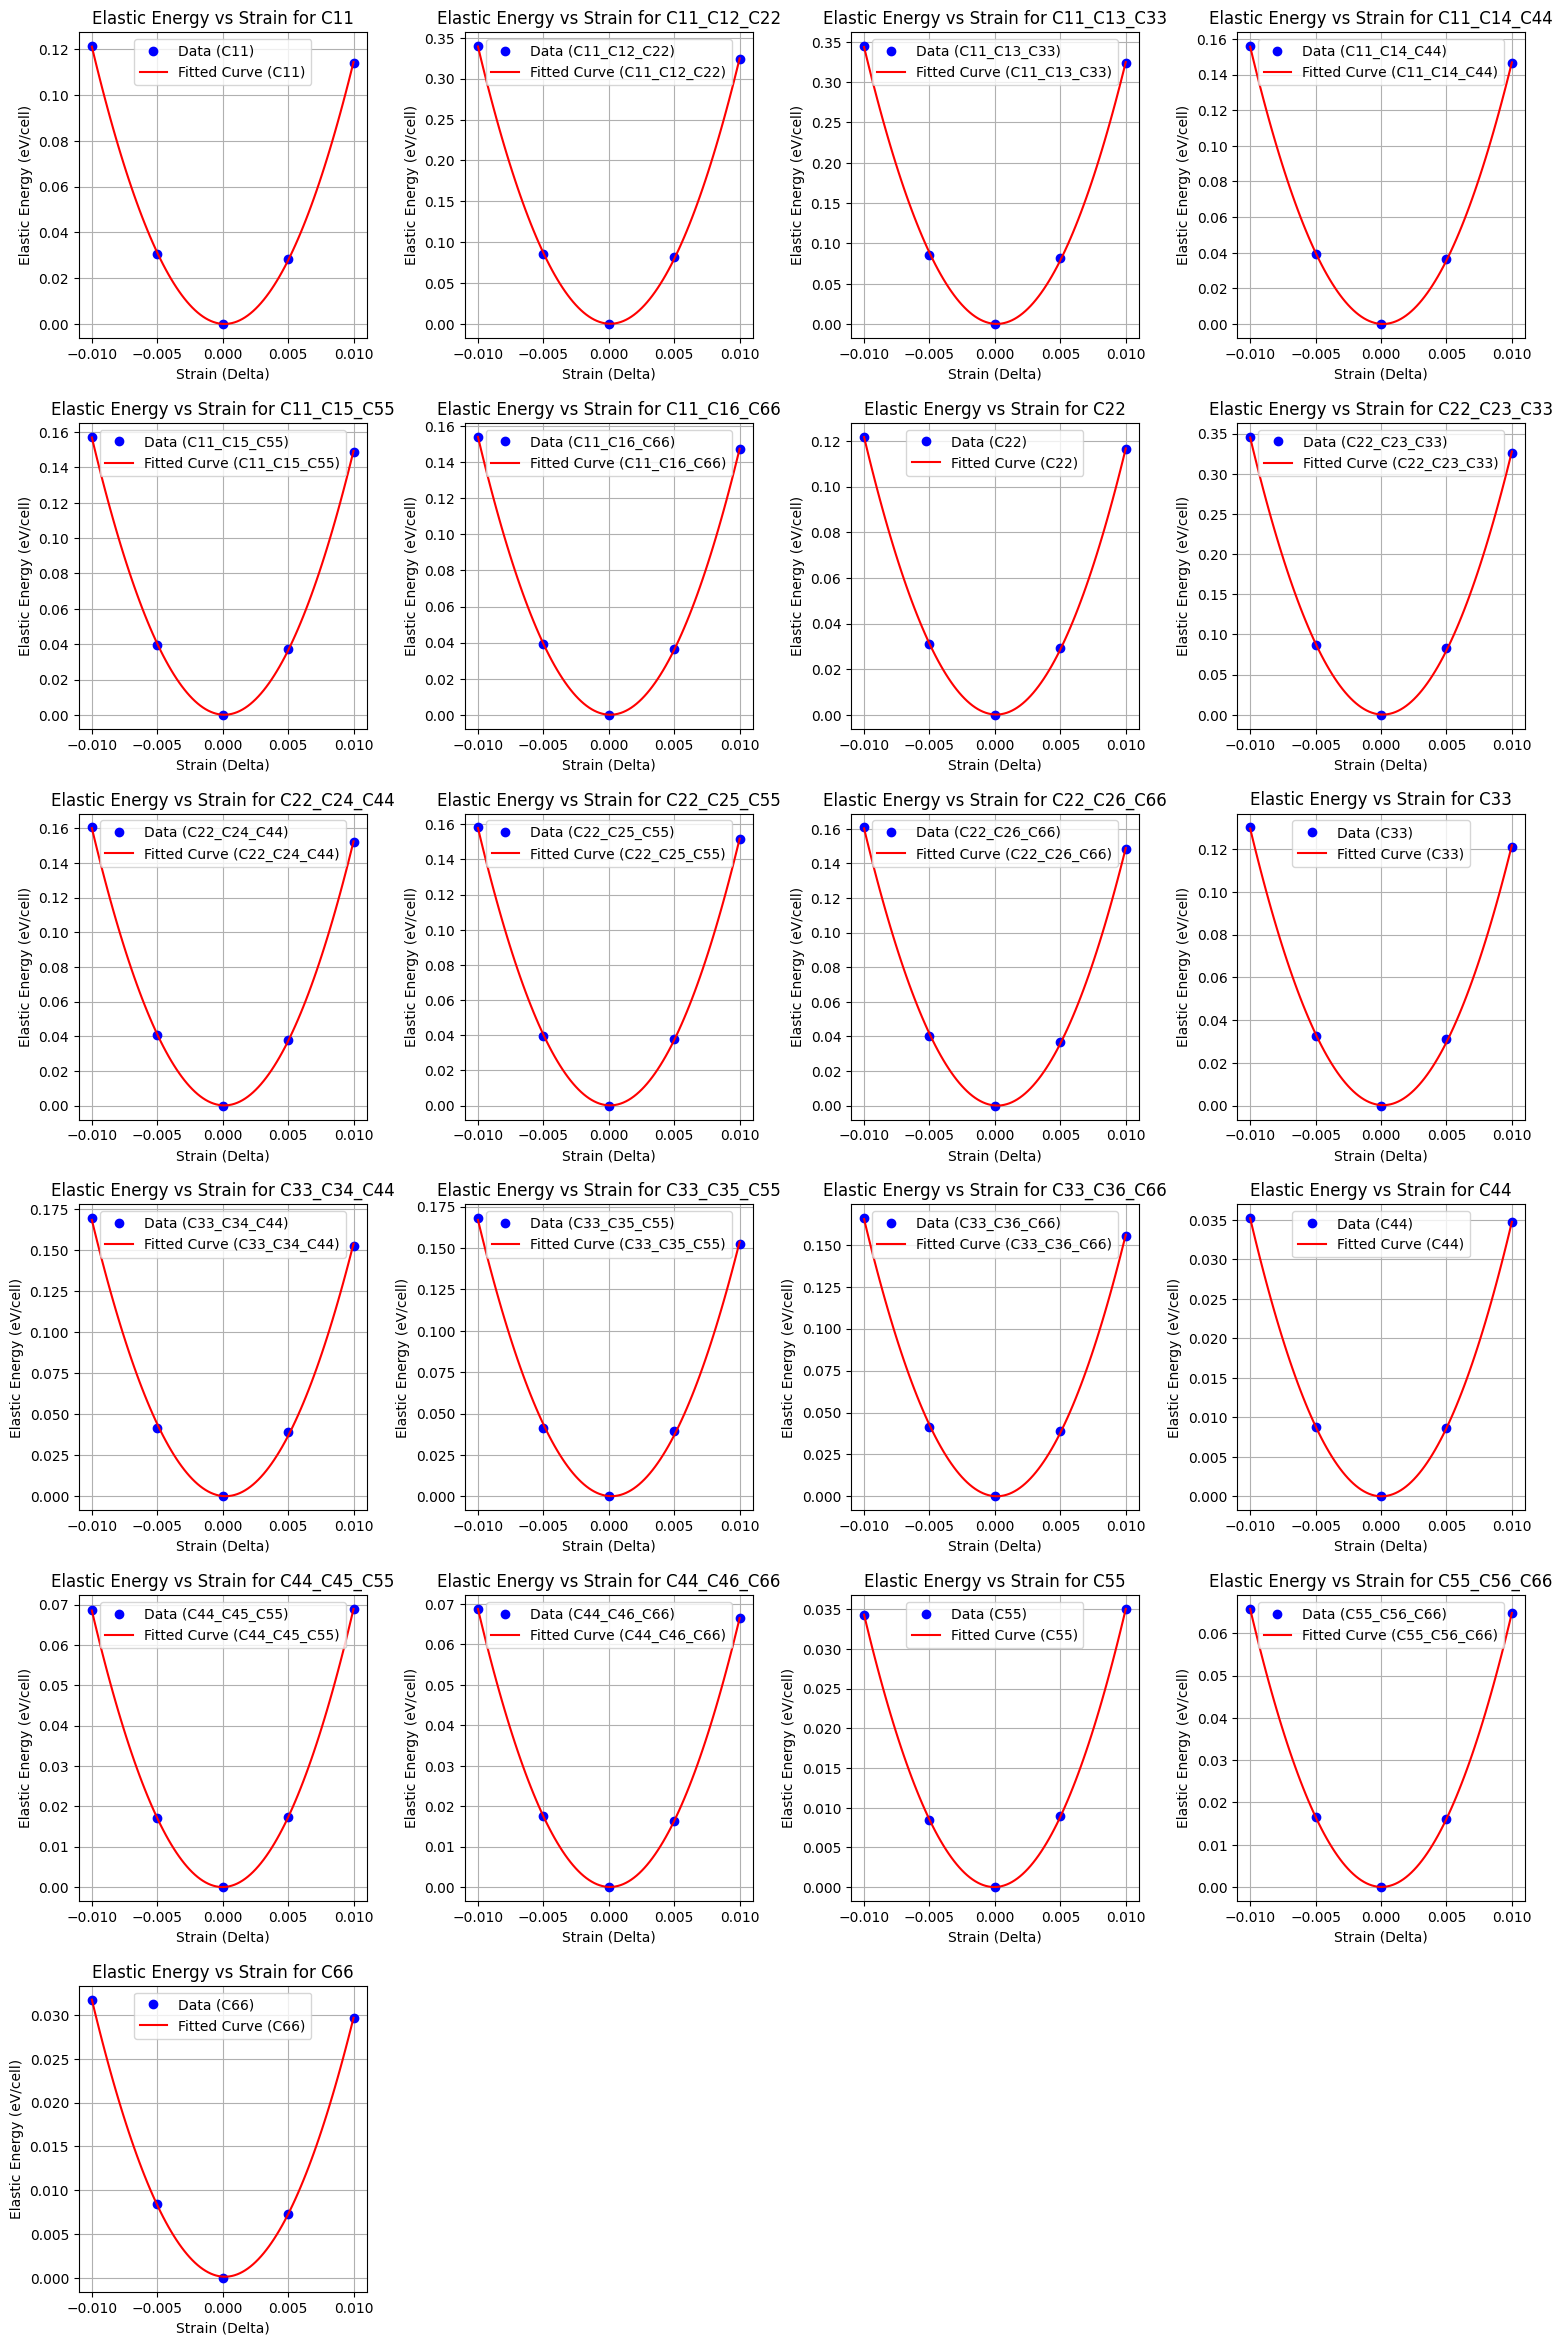

C11 C-value: 217.6372689364677 GPa
C11_C12_C22 C-value: 306.7930354540249 GPa
C11_C13_C33 C-value: 308.8740126180098 GPa
C11_C14_C44 C-value: 139.8008971970105 GPa
C11_C15_C55 C-value: 141.62753564515614 GPa
C11_C16_C66 C-value: 139.38554779736106 GPa
C22 C-value: 220.44662776570462 GPa
C22_C23_C33 C-value: 310.816980624397 GPa
C22_C24_C44 C-value: 144.5553391154129 GPa
C22_C25_C55 C-value: 143.1559474079704 GPa
C22_C26_C66 C-value: 143.0166163235479 GPa
C33 C-value: 232.23768602507593 GPa
C33_C34_C44 C-value: 149.03402710391822 GPa
C33_C35_C55 C-value: 148.20332830462016 GPa
C33_C36_C66 C-value: 148.64564501098252 GPa
C44 C-value: 64.68029186955074 GPa
C44_C45_C55 C-value: 63.579126847469276 GPa
C44_C46_C66 C-value: 62.559392516183706 GPa
C55 C-value: 64.19012141310478 GPa
C55_C56_C66 C-value: 60.35600493085648 GPa
C66 C-value: 56.59380126624847 GPa


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('energy_collab_potential_final')

# Extract the strain values
strain_values = data['Strain_values']

# Define formulas for each column based on the image
formulas = {
    'C11': lambda coef: 2 * coef,  # 1/2 * C11 * delta^2
    'C22': lambda coef: 2 * coef,  # 1/2 * C22 * delta^2
    'C33': lambda coef: 2 * coef,  # 1/2 * C33 * delta^2
    'C44': lambda coef: 2 * coef,  # 1/2 * C44 * delta^2
    'C55': lambda coef: 2 * coef,  # 1/2 * C55 * delta^2
    'C66': lambda coef: 2 * coef,  # 1/2 * C66 * delta^2
    'C11_C12_C22': lambda coef: 1 * coef,  # (C11/2 + C12 + C22/2) * delta^2
    'C11_C13_C33': lambda coef: 1 * coef,  # (C11/2 + C13 + C33/2) * delta^2
    'C11_C14_C44': lambda coef: 1 * coef,  # (C11/2 + C14 + C44/2) * delta^2
    'C11_C15_C55': lambda coef: 1 * coef,  # (C11/2 + C15 + C55/2) * delta^2
    'C11_C16_C66': lambda coef: 1 * coef,  # (C11/2 + C16 + C66/2) * delta^2
    'C22_C23_C33': lambda coef: 1 * coef,  # (C22/2 + C23 + C33/2) * delta^2
    'C22_C24_C44': lambda coef: 1 * coef, 
    'C22_C25_C55': lambda coef: 1 * coef,  # (C22/2 + C25 + C55/2) * delta^2
    'C22_C26_C66': lambda coef: 1 * coef,  # (C22/2 + C26 + C66/2) * delta^2
    'C33_C34_C44': lambda coef: 1 * coef,
    'C33_C35_C55': lambda coef: 1 * coef,  # (C33/2 + C35 + C55/2) * delta^2
    'C33_C36_C66': lambda coef: 1 * coef,  # (C33/2 + C36 + C66/2) * delta^2
    'C44_C45_C55': lambda coef: 1 * coef,
    'C44_C46_C66': lambda coef: 1 * coef,  # (C44/2 + C46 + C66/2) * delta^2
    'C55_C56_C66': lambda coef: 1 * coef
}

# The rest of the script remains the same

# Prepare to store computed C-values
C_values = {}
V0 = 1731.43

# Define subplot grid dimensions
num_columns = len(data.columns) - 1  # Excluding 'Strain_values'
num_rows = (num_columns + 3) // 4  # For a 3x4 grid layout, adjust as needed

fig, axs = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))
fig.tight_layout(pad=4.0)  # Adjust spacing between subplots

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Iterate over each column in the DataFrame (excluding 'Strain_values')
for i, column in enumerate(data.columns[1:]):
    # Fit a quadratic polynomial to the data
    coefficients = np.polyfit(strain_values, data[column], 2)
    
    # Apply the specific formula for each column
    if column in formulas:
        C_value = formulas[column](coefficients[0])
        C_values[column] = C_value * (160.21766/V0)
    else:
        print(f"No formula defined for {column}, skipping.")
        continue

    # Generate values for the fitted curve
    strain_fit = np.linspace(strain_values.min(), strain_values.max(), 100)
    energy_fit = np.polyval(coefficients, strain_fit)

    # Plot the data and the fitted curve in a subplot
    axs[i].plot(strain_values, data[column], 'o', label=f"Data ({column})", color="blue")
    axs[i].plot(strain_fit, energy_fit, '-', label=f"Fitted Curve ({column})", color="red")
    axs[i].set_title(f"Elastic Energy vs Strain for {column}")
    axs[i].set_xlabel("Strain (Delta)")
    axs[i].set_ylabel("Elastic Energy (eV/cell)")
    axs[i].legend()
    axs[i].grid(True)

# Remove any empty subplots (if number of columns < grid size)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout and show the plot
plt.show()

# Print out the calculated C-values
for key, value in C_values.items():
    print(f"{key} C-value: {value} GPa")
    #print(f"{value}")


## Indiviual Elastic constant calculation using potential

In [4]:
from sympy import symbols, Eq, solve, Matrix

# Define the variables
C11, C22, C33, C44, C55, C66, C12, C31, C14, C15, C16, C23, C24, C25, C26, C34, C35, C36, C45, C46, C56 = symbols('C11 C22 C33 C44 C55 C66 C12 C31 C14 C15 C16 C23 C24 C25 C26 C34 C35 C36 C45 C46 C56')

# Define the equations
eq1 = Eq(C11 -  217.6372689364677, 0)  
eq2 = Eq(C22  - 220.44662776570462, 0)
eq3 = Eq(C33  - 232.23768602507593, 0)
eq4 = Eq(C44  - 64.68029186955074, 0)
eq5 = Eq(C55 - 64.19012141310478, 0)
eq6 = Eq(C66  - 56.59380126624847 , 0)
eq7 = Eq(C11/2 + C12 + C22/2  - 306.7930354540249 , 0)
eq8 = Eq(C11/2 + C31 + C33/2  - 308.8740126180098 , 0)
eq9 = Eq(C11/2 + C14 + C44/2  - 139.8008971970105, 0)
eq10 = Eq(C11/2 + C15 + C55/2  - 141.62753564515614, 0)
eq11 = Eq(C11/2 + C16 + C66/2  -  139.38554779736106, 0)
eq12 = Eq(C22/2 + C23 + C33/2 - 310.816980624397, 0)
eq13 = Eq(C22/2 + C24 + C44/2 - 144.5553391154129, 0)
eq14 = Eq(C22/2 + C25 + C55/2 - 143.1559474079704 , 0)
eq15 = Eq(C22/2 + C26 + C66/2 - 143.0166163235479, 0)
eq16 = Eq(C33/2 + C34 + C44/2 - 149.03402710391822, 0)
eq17 = Eq(C33/2 + C35 + C55/2 - 148.20332830462016, 0)
eq18 = Eq(C33/2 + C36 + C66/2 -  148.64564501098252, 0)
eq19 = Eq(C44/2 + C45 + C55/2 - 63.579126847469276, 0)
eq20 = Eq(C44/2 + C46 + C66/2 -  62.559392516183706, 0)
eq21 = Eq(C55/2 + C56 + C66/2  -  60.35600493085648 , 0)

# Solve the equations
solution = solve([eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10, eq11, eq12, eq13, eq14, eq15, eq16, eq17, eq18, eq19, eq20, eq21], (C11, C22, C33, C44, C55, C66, C12, C31, C14, C15, C16, C23, C24, C25, C26, C34, C35, C36, C45, C46, C56))

# Construct the elastic tensor with substituted values
elastic_tensor = Matrix([
    [C11, C12, C31, C14,  C15,   C16],
    [C12, C22, C23, C24,  C25,   C26],
    [C31, C23, C33, C34,  C35,   C36],
    [C14, C24, C34, C44,  C45,   C46],
    [C15, C25, C35, C45,  C55,   C56],
    [C16, C26, C36, C46,  C56,   C66]
]).subs(solution)

# Compute the compliance matrix
compliance_matrix = elastic_tensor.inv()

# Extract substituted compliance values
compliance_values = compliance_matrix.subs(solution)
S11 = compliance_values[0, 0]
S12 = compliance_values[0, 1]
S66 = compliance_values[5, 5]
S33 = compliance_values[2, 2]
S44 = compliance_values[3, 3]
S31 = compliance_values[2, 0]
S22 = compliance_values[1, 1]
S23 = compliance_values[1, 2]
S55 = compliance_values[4, 4]

# Voigt bounds equations
KV = ((solution[C11] + solution[C22] + solution[C33] + 
       2 * (solution[C12] + solution[C23] + solution[C31])) / 9)
GV = ((solution[C11] + solution[C22] + solution[C33]) - 
      (solution[C12] + solution[C23] + solution[C31]) + 
      4 * (solution[C44] + solution[C55] + solution[C66])) / 15

# Reuss bounds equations
KR = 1 / (S11 + S22 + S33 + 2 * (S12 + S23 + S31))
GR = 15 / (4 * (S11 + S22 + S33) - 4 * (S12 + S23 + S31) + 3 * (S44 + S55 + S66))

# Voigt-Reuss-Hill averages
K_VRH = (KV + KR) / 2
G_VRH = (GV + GR) / 2

# Print results
print("Solution:", solution)
print(f"Compliance Matrix:\n{compliance_values}")
print(f"Voigt Bulk Modulus, KV: {KV}")
print(f"Voigt Shear Modulus, GV: {GV}")
print(f"Reuss Bulk Modulus, KR: {KR}")
print(f"Reuss Shear Modulus, GR: {GR}")
print(f"K-VRH: {K_VRH}")
print(f"G-VRH: {G_VRH}")

Solution: {C11: 217.637268936468, C12: 87.7510871029385, C14: -1.35788320599935, C15: 0.713840470369600, C16: 2.27001269600275, C22: 220.446627765705, C23: 84.4748237290065, C24: 1.99187929778515, C25: 0.837572818565100, C26: 4.49640180757125, C31: 83.9365351372380, C33: 232.237686025076, C34: 0.575038156604650, C35: -0.0105754144704000, C36: 4.22990136532075, C44: 64.6802918695507, C45: -0.856079793858450, C46: 1.92234594828410, C55: 64.1901214131048, C56: -0.0359564088201500, C66: 56.5938012662485}
Compliance Matrix:
Matrix([[0.00588334324501764, -0.00177618643297084, -0.00148095628807858, 0.000190573121624326, -3.99479489128787e-5, 9.32432857997816e-6], [-0.00177618643297084, 0.00581302045060274, -0.00146700777087678, -0.000195891591192685, -5.91055356236937e-5, -0.000274340390714998], [-0.00148095628807858, -0.00146700777087678, 0.00537897015878094, -2.65664605617837e-5, 3.60170467695819e-5, -0.000225150140001498], [0.000190573121624326, -0.000195891591192685, -2.65664605617837e-5,

## Indiviual Elastic constant calculation using dft

In [7]:
from sympy import symbols, Eq, solve, Matrix

# Define the variables
C11, C22, C33, C44, C55, C66, C12, C31, C14, C15, C16, C23, C24, C25, C26, C34, C35, C36, C45, C46, C56 = symbols('C11 C22 C33 C44 C55 C66 C12 C31 C14 C15 C16 C23 C24 C25 C26 C34 C35 C36 C45 C46 C56')

# Define the equations
eq1 = Eq(C11 -  200.980462522328, 0)  
eq2 = Eq(C22  - 205.200052858627, 0)
eq3 = Eq(C33  - 231.030502473716, 0)
eq4 = Eq(C44  - 69.6814053281792, 0)
eq5 = Eq(C55 - 73.3404987024236, 0)
eq6 = Eq(C66  - 50.9417710525127, 0)
eq7 = Eq(C11/2 + C12 + C22/2  - 305.840983774759, 0)
eq8 = Eq(C11/2 + C31 + C33/2  - 298.306001031313, 0)
eq9 = Eq(C11/2 + C14 + C44/2  - 134.202008440533, 0)
eq10 = Eq(C11/2 + C15 + C55/2  - 134.519270871846, 0)
eq11 = Eq(C11/2 + C16 + C66/2  - 124.885068374661, 0)
eq12 = Eq(C22/2 + C23 + C33/2  - 302.959183357075, 0)
eq13 = Eq(C22/2 + C24 + C44/2  - 136.745395598176, 0)
eq14 = Eq(C22/2 + C25 + C55/2  - 135.531866798415, 0)
eq15 = Eq(C22/2 + C26 + C66/2  - 130.275885853169, 0)
eq16 = Eq(C33/2 + C34 + C44/2  - 149.620962601787, 0)
eq17 = Eq(C33/2 + C35 + C55/2  - 150.400899412085, 0)
eq18 = Eq(C33/2 + C36 + C66/2  - 139.709155477193, 0)
eq19 = Eq(C44/2 + C45 + C55/2  - 67.5610347456499, 0)
eq20 = Eq(C44/2 + C46 + C66/2  - 60.224341021808, 0)
eq21 = Eq(C55/2 + C56 + C66/2  - 58.7860846665683, 0)

# Solve the equations
solution = solve([eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10, eq11, eq12, eq13, eq14, eq15, eq16, eq17, eq18, eq19, eq20, eq21], (C11, C22, C33, C44, C55, C66, C12, C31, C14, C15, C16, C23, C24, C25, C26, C34, C35, C36, C45, C46, C56))

# Construct the elastic tensor with substituted values
elastic_tensor = Matrix([
    [C11, C12, C31, C14,  C15,   C16],
    [C12, C22, C23, C24,  C25,   C26],
    [C31, C23, C33, C34,  C35,   C36],
    [C14, C24, C34, C44,  C45,   C46],
    [C15, C25, C35, C45,  C55,   C56],
    [C16, C26, C36, C46,  C56,   C66]
]).subs(solution)

# Compute the compliance matrix
compliance_matrix = elastic_tensor.inv()

# Extract substituted compliance values
compliance_values = compliance_matrix.subs(solution)
S11 = compliance_values[0, 0]
S12 = compliance_values[0, 1]
S66 = compliance_values[5, 5]
S33 = compliance_values[2, 2]
S44 = compliance_values[3, 3]
S31 = compliance_values[2, 0]
S22 = compliance_values[1, 1]
S23 = compliance_values[1, 2]
S55 = compliance_values[4, 4]

# Voigt bounds equations
KV = ((solution[C11] + solution[C22] + solution[C33] + 
       2 * (solution[C12] + solution[C23] + solution[C31])) / 9)
GV = ((solution[C11] + solution[C22] + solution[C33]) - 
      (solution[C12] + solution[C23] + solution[C31]) + 
      4 * (solution[C44] + solution[C55] + solution[C66])) / 15

# Reuss bounds equations
KR = 1 / (S11 + S22 + S33 + 2 * (S12 + S23 + S31))
GR = 15 / (4 * (S11 + S22 + S33) - 4 * (S12 + S23 + S31) + 3 * (S44 + S55 + S66))

# Voigt-Reuss-Hill averages
K_VRH = (KV + KR) / 2
G_VRH = (GV + GR) / 2

# Print results
print("Solution:", solution)
print(f"Compliance Matrix:\n{compliance_values}")
print(f"Voigt Bulk Modulus, KV: {KV}")
print(f"Voigt Shear Modulus, GV: {GV}")
print(f"Reuss Bulk Modulus, KR: {KR}")
print(f"Reuss Shear Modulus, GR: {GR}")
print(f"K-VRH: {K_VRH}")
print(f"G-VRH: {G_VRH}")

Solution: {C11: 200.980462522328, C12: 102.750726084281, C14: -1.12892548472060, C15: -2.64120974052980, C16: -1.07604841275935, C22: 205.200052858627, C23: 84.8439056909035, C24: -0.695333495227100, C25: -3.73840898211030, C26: 2.20497389759915, C31: 82.3005185332910, C33: 231.030502473716, C34: -0.734991299160600, C35: -1.78460117598480, C36: -1.27698128592135, C44: 69.6814053281792, C45: -3.94991726965150, C46: -0.0872471685379500, C55: 73.3404987024236, C56: -3.35505021089985, C66: 50.9417710525127}
Compliance Matrix:
Matrix([[0.00707400650305509, -0.00294998075326838, -0.00143437616425431, 7.51583449943298e-5, 8.48241707029757e-5, 0.000246871652768987], [-0.00294998075326838, 0.00698455618687076, -0.00151472527188774, 1.65488630655964e-5, 0.000195995974353399, -0.000389667289229209], [-0.00143437616425431, -0.00151472527188774, 0.00539676965645043, 1.94279253325716e-5, 1.13373249329551e-5, 0.000171328508863624], [7.51583449943298e-5, 1.65488630655964e-5, 1.94279253325716e-5, 0.014